In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('weatherAUS.csv')

In [4]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
data.shape

(145460, 23)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [7]:
numerical_values=[i for i in data.columns if data[i].dtypes=='float64']
categorical_values=[i for i in data.columns if data[i].dtypes=='object']

In [8]:
categorical_values

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [9]:
numerical_values

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [10]:
missing_values=data.isnull().sum()
missing_percentage=data.isnull().sum()*100/len(data)
value={
   'missing_values':missing_values,
   'missing%':missing_percentage,
   'data types':data.dtypes
}
frame=pd.DataFrame(value)
frame

,missing_values,missing%,data types
Date,0,0.000000,object
Location,0,0.000000,object
MinTemp,1485,1.020899,float64
MaxTemp,1261,0.866905,float64
Rainfall,3261,2.241853,float64
Evaporation,62790,43.166506,float64
Sunshine,69835,48.009762,float64
WindGustDir,10326,7.098859,object
WindGustSpeed,10263,7.055548,float64
WindDir9am,10566,7.263853,object


In [11]:
for i in numerical_values:
    if (data[i].isnull().sum())>0:
        data[i]=data[i].fillna(data[i].mean())

In [12]:
data.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir      10326
WindGustSpeed        0
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         3261
RainTomorrow      3267
dtype: int64

In [13]:
data['RainToday']=pd.get_dummies(data['RainToday'],drop_first=True)
data['RainTomorrow']=pd.get_dummies(data['RainTomorrow'],drop_first=True)

In [14]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.468232,7.611178,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,5.468232,7.611178,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,5.468232,7.611178,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,5.468232,7.611178,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,5.468232,7.611178,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0


In [15]:
data['RainTomorrow']=data['RainTomorrow'].ffill()
data['RainToday']=data['RainToday'].ffill()

In [16]:
data.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir      10326
WindGustSpeed        0
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday            0
RainTomorrow         0
dtype: int64

In [17]:
data['WindGustDir']=data['WindGustDir'].ffill()
data['WindDir9am']=data['WindDir9am'].ffill()
data['WindDir3pm']=data['WindDir3pm'].ffill()

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        145460 non-null  float64
 3   MaxTemp        145460 non-null  float64
 4   Rainfall       145460 non-null  float64
 5   Evaporation    145460 non-null  float64
 6   Sunshine       145460 non-null  float64
 7   WindGustDir    145460 non-null  object 
 8   WindGustSpeed  145460 non-null  float64
 9   WindDir9am     145460 non-null  object 
 10  WindDir3pm     145460 non-null  object 
 11  WindSpeed9am   145460 non-null  float64
 12  WindSpeed3pm   145460 non-null  float64
 13  Humidity9am    145460 non-null  float64
 14  Humidity3pm    145460 non-null  float64
 15  Pressure9am    145460 non-null  float64
 16  Pressure3pm    145460 non-null  float64
 17  Cloud9am       145460 non-nul

In [19]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df=label.fit_transform(data)

ValueError: y should be a 1d array, got an array of shape (145460, 23) instead.

In [ ]:
data.isnull().sum()

In [ ]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
scaled_data=scale.fit_transform(data)

# outlier treatment

In [ ]:
sns.boxplot(data.MinTemp)

In [ ]:
iqr=data.MinTemp.quantile(0.75)-data.MinTemp.quantile(0.25)
lower_quantile=data.MinTemp.quantile(0.25)-(1.5*iqr)
upper_quantile=data.MinTemp.quantile(0.75)+(1.5*iqr)
print(lower_quantile,upper_quantile)

In [ ]:
data.loc[data['MinTemp']>=30,'MinTemp']=30
data.loc[data['MinTemp']<=-5.95,'MinTemp']=-5.95

In [ ]:
sns.boxplot(data.MinTemp)

In [ ]:
sns.boxplot(data.MaxTemp)

In [ ]:
iqr=data.MaxTemp.quantile(0.75)-data.MaxTemp.quantile(0.25)
lower_quantile=data.MaxTemp.quantile(0.25)-(1.5*iqr)
upper_quantile=data.MaxTemp.quantile(0.75)+(1.5*iqr)
print(lower_quantile,upper_quantile)

In [ ]:
data.loc[data['MaxTemp']>=40,'MaxTemp']=40
data.loc[data['MaxTemp']<=2.7,'MaxTemp']=2.7

In [ ]:
sns.boxplot(data.MaxTemp)

In [ ]:
sns.boxplot(data.Rainfall)

In [ ]:
iqr=data.Rainfall.quantile(0.75)-data.Rainfall.quantile(0.25)
lower_quantile=data.Rainfall.quantile(0.25)-(1.5*iqr)
upper_quantile=data.Rainfall.quantile(0.75)+(1.5*iqr)
print(lower_quantile,upper_quantile)

In [20]:
data.loc[data['Rainfall']>=1,'Rainfall']=1
data.loc[data['Rainfall']<=-1.5,'Rainfall']=-1.5

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rainfall'>

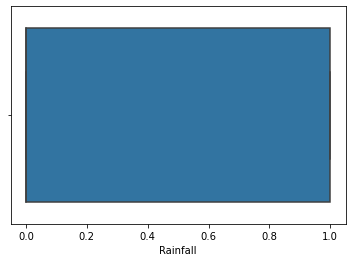

In [21]:
sns.boxplot(data.Rainfall)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Evaporation'>

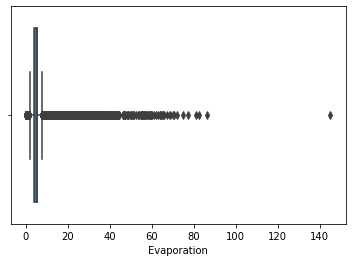

In [22]:
sns.boxplot(data.Evaporation)

In [23]:
iqr=data.Evaporation.quantile(0.75)-data.Evaporation.quantile(0.25)
lower_quantile=data.Evaporation.quantile(0.25)-(1.5*iqr)
upper_quantile=data.Evaporation.quantile(0.75)+(1.5*iqr)
print(lower_quantile,upper_quantile)

1.7976527156163042 7.67057880730616


In [24]:
data.loc[data['Evaporation']>=7.6,'Evaporation']=7.6
data.loc[data['Evaporation']<=1.8,'Evaporation']=1.8

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Evaporation'>

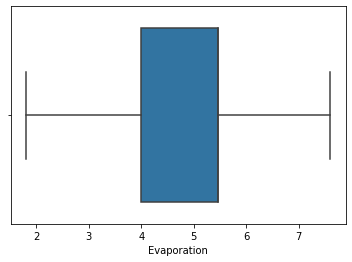

In [25]:
sns.boxplot(data.Evaporation)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sunshine'>

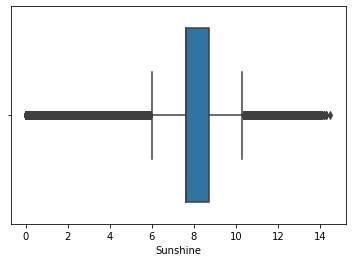

In [26]:
sns.boxplot(data.Sunshine)

In [27]:
iqr=data.Sunshine.quantile(0.75)-data.Sunshine.quantile(0.25)
lower_quantile=data.Sunshine.quantile(0.25)-(1.5*iqr)
upper_quantile=data.Sunshine.quantile(0.75)+(1.5*iqr)
print(lower_quantile,upper_quantile)

5.977943801652863 10.33323371900828


In [28]:
data.loc[data['Sunshine']>=10.33,'Sunshine']=10.33
data.loc[data['Sunshine']<=6,'Sunshine']=6

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sunshine'>

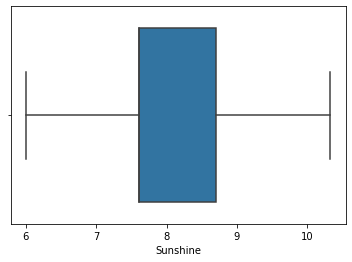

In [29]:
sns.boxplot(data.Sunshine)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='WindGustSpeed'>

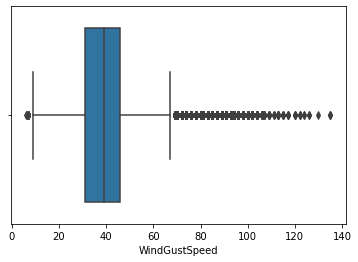

In [30]:
sns.boxplot(data.WindGustSpeed)

In [31]:
iqr=data.WindGustSpeed.quantile(0.75)-data.WindGustSpeed.quantile(0.25)
lower_quantile=data.WindGustSpeed.quantile(0.25)-(1.5*iqr)
upper_quantile=data.WindGustSpeed.quantile(0.75)+(1.5*iqr)
print(lower_quantile,upper_quantile)

8.5 68.5


In [32]:
data.loc[data['WindGustSpeed']>=68.5,'WindGustSpeed']=68.5
data.loc[data['WindGustSpeed']<=8.5,'WindGustSpeed']=8.5

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='WindGustSpeed'>

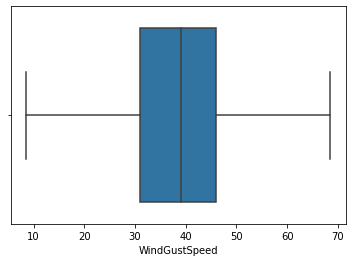

In [33]:
sns.boxplot(data.WindGustSpeed)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='WindGustSpeed'>

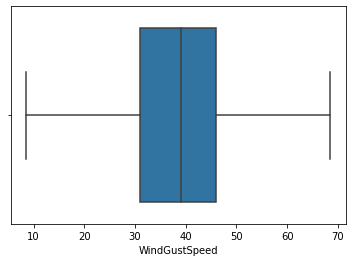

In [34]:
sns.boxplot(data.WindGustSpeed)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='WindSpeed3pm'>

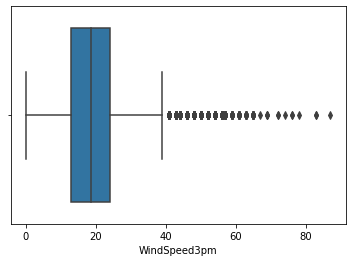

In [35]:
sns.boxplot(data.WindSpeed3pm)

In [36]:
iqr=data.WindSpeed3pm.quantile(0.75)-data.WindSpeed3pm.quantile(0.25)
lower_quantile=data.WindSpeed3pm.quantile(0.25)-(1.5*iqr)
upper_quantile=data.WindSpeed3pm.quantile(0.75)+(1.5*iqr)
print(lower_quantile,upper_quantile)

-3.5 40.5


In [37]:
data.loc[data['WindSpeed3pm']>=40.5,'WindSpeed3pm']=40.5
data.loc[data['WindSpeed3pm']<=-3.5,'WindSpeed3pm']=-3.5

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='WindSpeed3pm'>

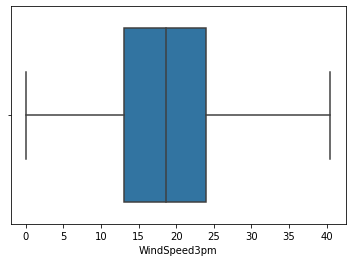

In [38]:
sns.boxplot(data.WindSpeed3pm)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Humidity9am'>

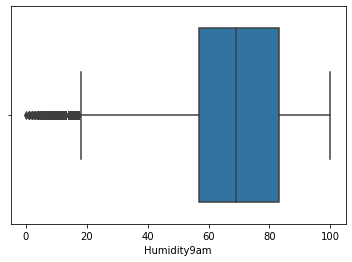

In [39]:
sns.boxplot(data.Humidity9am)

In [40]:
iqr=data.Humidity9am.quantile(0.75)-data.Humidity9am.quantile(0.25)
lower_quantile=data.Humidity9am.quantile(0.25)-(1.5*iqr)
upper_quantile=data.Humidity9am.quantile(0.75)+(1.5*iqr)
print(lower_quantile,upper_quantile)

18.0 122.0


In [41]:
data.loc[data['Humidity9am']>=122,'Humidity9am']=122
data.loc[data['Humidity9am']<=18,'Humidity9am']=18

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Humidity9am'>

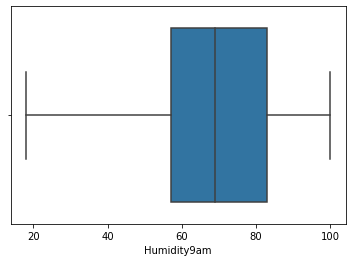

In [42]:
sns.boxplot(data.Humidity9am)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Humidity3pm'>

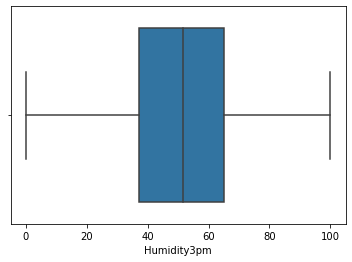

In [43]:
sns.boxplot(data.Humidity3pm)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pressure9am'>

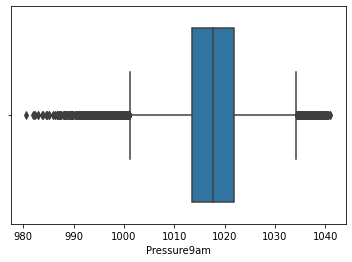

In [44]:
sns.boxplot(data.Pressure9am)

In [45]:
iqr=data.Pressure9am.quantile(0.75)-data.Pressure9am.quantile(0.25)
lower_quantile=data.Pressure9am.quantile(0.25)-(1.5*iqr)
upper_quantile=data.Pressure9am.quantile(0.75)+(1.5*iqr)
print(lower_quantile,upper_quantile)

1001.0500000000001 1034.25


In [46]:
data.loc[data['Pressure9am']>=1034,'Pressure9am']=1034
data.loc[data['Pressure9am']<=1002,'Pressure9am']=1002

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pressure9am'>

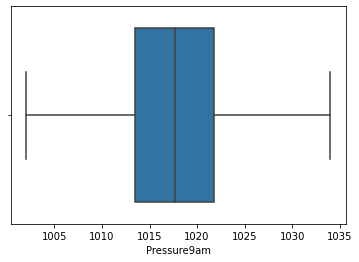

In [47]:
sns.boxplot(data.Pressure9am)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pressure3pm'>

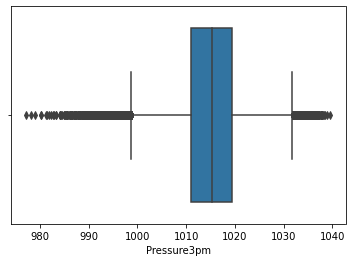

In [48]:
sns.boxplot(data.Pressure3pm)

In [49]:
iqr=data.Pressure3pm.quantile(0.75)-data.Pressure3pm.quantile(0.25)
lower_quantile=data.Pressure3pm.quantile(0.25)-(1.5*iqr)
upper_quantile=data.Pressure3pm.quantile(0.75)+(1.5*iqr)
print(lower_quantile,upper_quantile)

998.6500000000001 1031.85


In [50]:
data.loc[data['Pressure3pm']>=1031,'Pressure3pm']=1031
data.loc[data['Pressure3pm']<=1000,'Pressure3pm']=1000

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pressure3pm'>

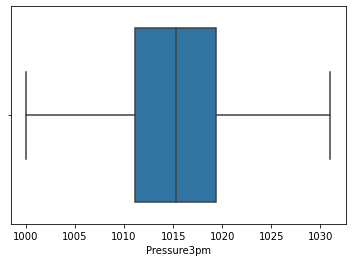

In [51]:
sns.boxplot(data.Pressure3pm)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temp3pm'>

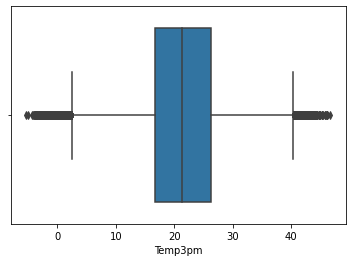

In [52]:
sns.boxplot(data.Temp3pm)

In [53]:
iqr=data.Temp3pm.quantile(0.75)-data.Temp3pm.quantile(0.25)
lower_quantile=data.Temp3pm.quantile(0.25)-(1.5*iqr)
upper_quantile=data.Temp3pm.quantile(0.75)+(1.5*iqr)
print(lower_quantile,upper_quantile)

2.4499999999999993 40.45


In [54]:
data.loc[data['Temp3pm']>=40.45,'Temp3pm']=40.45
data.loc[data['Temp3pm']<=2.5,'Temp3pm']=2.5

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temp3pm'>

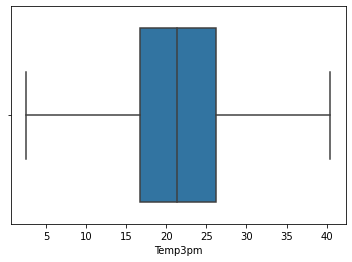

In [55]:
sns.boxplot(data.Temp3pm)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temp9am'>

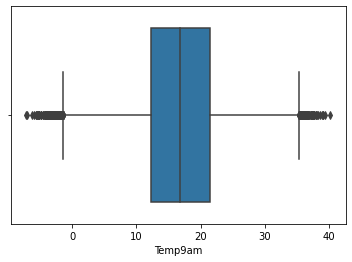

In [56]:
sns.boxplot(data.Temp9am)

In [57]:
iqr=data.Temp9am.quantile(0.75)-data.Temp9am.quantile(0.25)
lower_quantile=data.Temp9am.quantile(0.25)-(1.5*iqr)
upper_quantile=data.Temp9am.quantile(0.75)+(1.5*iqr)
print(lower_quantile,upper_quantile)

-1.4999999999999982 35.3


In [58]:
data.loc[data['Temp9am']>=35.3,'Temp9am']=35.3
data.loc[data['Temp9am']<=-1.4,'Temp9am']=-1.4

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temp9am'>

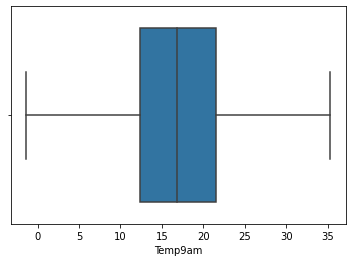

In [59]:
sns.boxplot(data.Temp9am)

In [60]:
data.shape

(145460, 23)

In [61]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.468232,7.611178,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,5.468232,7.611178,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,5.468232,7.611178,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,5.468232,7.611178,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,5.468232,7.611178,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        145460 non-null  float64
 3   MaxTemp        145460 non-null  float64
 4   Rainfall       145460 non-null  float64
 5   Evaporation    145460 non-null  float64
 6   Sunshine       145460 non-null  float64
 7   WindGustDir    145460 non-null  object 
 8   WindGustSpeed  145460 non-null  float64
 9   WindDir9am     145460 non-null  object 
 10  WindDir3pm     145460 non-null  object 
 11  WindSpeed9am   145460 non-null  float64
 12  WindSpeed3pm   145460 non-null  float64
 13  Humidity9am    145460 non-null  float64
 14  Humidity3pm    145460 non-null  float64
 15  Pressure9am    145460 non-null  float64
 16  Pressure3pm    145460 non-null  float64
 17  Cloud9am       145460 non-nul

In [63]:
data["Date"] = pd.to_datetime(data["Date"], format = "%Y-%m-%dT", errors = "coerce")

In [64]:
data["Date_month"] = data["Date"].dt.month
data["Date_day"] = data["Date"].dt.day

In [65]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_month,Date_day
0,2008-12-01,Albury,13.4,22.9,0.6,5.468232,7.611178,W,44.0,W,...,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0,12,1
1,2008-12-02,Albury,7.4,25.1,0.0,5.468232,7.611178,WNW,44.0,NNW,...,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0,12,2
2,2008-12-03,Albury,12.9,25.7,0.0,5.468232,7.611178,WSW,46.0,W,...,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0,12,3
3,2008-12-04,Albury,9.2,28.0,0.0,5.468232,7.611178,NE,24.0,SE,...,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0,12,4
4,2008-12-05,Albury,17.5,32.3,1.0,5.468232,7.611178,W,41.0,ENE,...,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0,12,5


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        145460 non-null  float64       
 3   MaxTemp        145460 non-null  float64       
 4   Rainfall       145460 non-null  float64       
 5   Evaporation    145460 non-null  float64       
 6   Sunshine       145460 non-null  float64       
 7   WindGustDir    145460 non-null  object        
 8   WindGustSpeed  145460 non-null  float64       
 9   WindDir9am     145460 non-null  object        
 10  WindDir3pm     145460 non-null  object        
 11  WindSpeed9am   145460 non-null  float64       
 12  WindSpeed3pm   145460 non-null  float64       
 13  Humidity9am    145460 non-null  float64       
 14  Humidity3pm    145460 non-null  float64       
 15  

In [67]:
from sklearn.preprocessing import LabelEncoder
data.loc[:,['Location','WindGustDir','WindDir9am','WindDir3pm']]=data.loc[:,['Location','WindGustDir','WindDir9am','WindDir3pm']].apply(LabelEncoder().fit_transform)

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  int32         
 2   MinTemp        145460 non-null  float64       
 3   MaxTemp        145460 non-null  float64       
 4   Rainfall       145460 non-null  float64       
 5   Evaporation    145460 non-null  float64       
 6   Sunshine       145460 non-null  float64       
 7   WindGustDir    145460 non-null  int32         
 8   WindGustSpeed  145460 non-null  float64       
 9   WindDir9am     145460 non-null  int32         
 10  WindDir3pm     145460 non-null  int32         
 11  WindSpeed9am   145460 non-null  float64       
 12  WindSpeed3pm   145460 non-null  float64       
 13  Humidity9am    145460 non-null  float64       
 14  Humidity3pm    145460 non-null  float64       
 15  

In [69]:
from sklearn.preprocessing import StandardScaler
scaled_data=StandardScaler().fit_transform(data,)

TypeError: invalid type promotion

In [70]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_month,Date_day
0,2008-12-01,2,13.4,22.9,0.6,5.468232,7.611178,13,44.0,13,...,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0,12,1
1,2008-12-02,2,7.4,25.1,0.0,5.468232,7.611178,14,44.0,6,...,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0,12,2
2,2008-12-03,2,12.9,25.7,0.0,5.468232,7.611178,15,46.0,13,...,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0,12,3
3,2008-12-04,2,9.2,28.0,0.0,5.468232,7.611178,4,24.0,9,...,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0,12,4
4,2008-12-05,2,17.5,32.3,1.0,5.468232,7.611178,13,41.0,1,...,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0,12,5


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

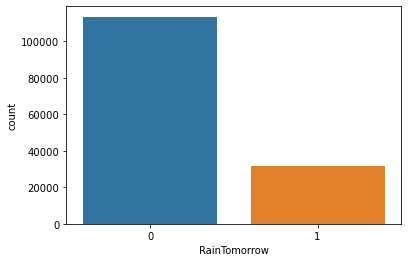

In [71]:
sns.countplot(data.RainTomorrow	)

In [72]:
data.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Date_month       0
Date_day         0
dtype: int64

In [73]:
#from the above graph we know that the data is imbalanced
x=data.drop(['RainTomorrow','Date'],axis=1)

In [74]:
y=data.RainTomorrow

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  int32         
 2   MinTemp        145460 non-null  float64       
 3   MaxTemp        145460 non-null  float64       
 4   Rainfall       145460 non-null  float64       
 5   Evaporation    145460 non-null  float64       
 6   Sunshine       145460 non-null  float64       
 7   WindGustDir    145460 non-null  int32         
 8   WindGustSpeed  145460 non-null  float64       
 9   WindDir9am     145460 non-null  int32         
 10  WindDir3pm     145460 non-null  int32         
 11  WindSpeed9am   145460 non-null  float64       
 12  WindSpeed3pm   145460 non-null  float64       
 13  Humidity9am    145460 non-null  float64       
 14  Humidity3pm    145460 non-null  float64       
 15  

In [76]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=25)

In [77]:
y_train

60694     0
98558     0
115224    0
36915     0
40015     0
         ..
130365    1
92303     0
6618      0
90430     0
29828     0
Name: RainTomorrow, Length: 109095, dtype: uint8

In [78]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_train_res, y_train_res = smote.fit_resample(x_train, y_train)

In [79]:
from collections import Counter

In [80]:
print('data before balancing {}'.format(Counter(y_train)))
print('data before balancing {}'.format(Counter(y_train_res)))

data before balancing Counter({0: 85248, 1: 23847})
data before balancing Counter({0: 85248, 1: 85248})


In [81]:
X_train_res.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Date_month,Date_day
0,6,22.9,38.4,0.0,5.468232,7.611178,3,46.0,11,6,...,21.0,1010.8,1006.9,4.447461,8.00000,27.7,36.20,0,2,24
1,0,20.6,24.1,0.0,7.600000,7.611178,9,37.0,1,10,...,46.0,1011.9,1011.9,4.447461,4.50993,22.9,23.60,0,11,14
2,29,11.0,24.7,0.0,5.468232,10.330000,0,35.0,5,13,...,30.0,1017.0,1013.4,4.447461,1.00000,17.5,22.70,0,8,28
3,42,23.5,41.6,0.0,7.600000,10.330000,7,57.0,1,6,...,7.0,1009.9,1005.3,4.000000,3.00000,28.6,40.45,0,1,22
4,45,10.5,30.0,0.0,4.000000,9.800000,14,28.0,14,7,...,28.0,1021.4,1016.2,0.000000,1.00000,20.2,29.70,0,4,23


In [82]:
!pip install Xgboost

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [84]:
model1=LogisticRegression()
model2=SVC()
model3=DecisionTreeClassifier()
model4=RandomForestClassifier()

In [85]:
model1.fit(X_train_res,y_train_res)
y_hat=model1.predict(x_test)

C:\Users\Prashant\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [108]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_auc_score

In [87]:
print(classification_report(y_hat,y_test))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84     24078
           1       0.75      0.49      0.60     12287

    accuracy                           0.77     36365
   macro avg       0.77      0.70      0.72     36365
weighted avg       0.77      0.77      0.76     36365



0.7049558753102362

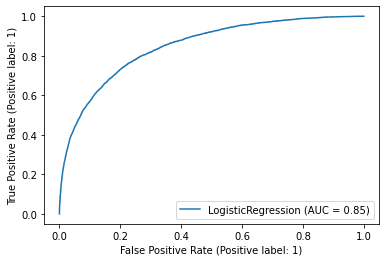

In [105]:
metrics.plot_roc_curve(model1,x_test,y_test)
metrics.roc_auc_score(y_hat,y_test,average=None)

In [91]:
model3.fit(X_train_res,y_train_res)
y_pre=model3.predict(x_test)

In [92]:
print(classification_report(y_pre,y_test))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85     27252
           1       0.56      0.49      0.52      9113

    accuracy                           0.78     36365
   macro avg       0.70      0.68      0.69     36365
weighted avg       0.77      0.78      0.77     36365



0.6817680744216622

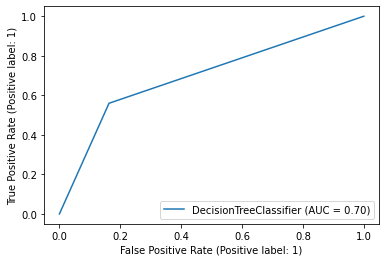

In [107]:
metrics.plot_roc_curve(model3,x_test,y_test)
metrics.roc_auc_score(y_pre,y_test)

In [93]:
model4.fit(X_train_res,y_train_res)
y_pree=model4.predict(x_test)

In [94]:
print(classification_report(y_pree,y_test))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90     28888
           1       0.62      0.67      0.64      7477

    accuracy                           0.85     36365
   macro avg       0.77      0.78      0.77     36365
weighted avg       0.85      0.85      0.85     36365



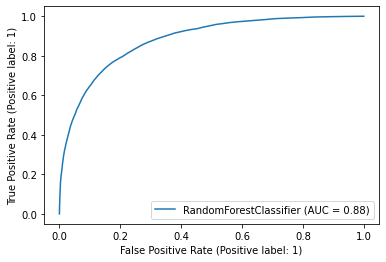

In [102]:
metrics.plot_roc_curve(model4, x_test, y_test)

In [113]:
from xgboost import XGBClassifier

In [115]:
xgb=XGBClassifier()
xgb.fit(X_train_res,y_train_res)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:11:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [116]:
y_pre_=xgb.predict(x_test)

In [117]:
print(classification_report(y_pre_,y_test))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91     30045
           1       0.57      0.72      0.64      6320

    accuracy                           0.86     36365
   macro avg       0.75      0.80      0.77     36365
weighted avg       0.87      0.86      0.86     36365



0.8037788254327368

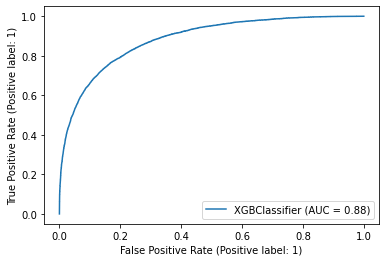

In [119]:
metrics.plot_roc_curve(xgb,x_test,y_test)
metrics.roc_auc_score(y_pre_,y_test)

In [123]:
print(confusion_matrix(y_pre_,y_test))

[[26583  3462]
 [ 1752  4568]]


In [125]:
import joblib
import pickle

In [126]:
joblib.dump(xgb,"xgb.pkl")

['xgb.pkl']